<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:140px;padding:10px;margin:10px 0 0 0;line-height:1.2">GRADIENT BOOSTING MACHINES</div>

1. [Introducción](#Introducción)
    1. [Árboles de decisión](#Árboles-de-decisión)
    1. [Random Forest](#Random-Forest)
    1. [Boosting](#Boosting)
1. [El dataset "breast cancer Wisconsin"](#El-dataset-"breast-cancer-Wisconsin")
    1. [DecisionTreeClassifier y Breast Cancer](#DecisionTreeClassifier-y-Breast-Cancer)
    1. [RandomForestClassifier y Breast Cancer](#RandomForestClassifier-y-Breast-Cancer)
1. [AdaBoost](#AdaBoost)
    1. [AdaBoost y Breast Cancer](#AdaBoost-y-Breast-Cancer)
    1. [Parámetros de AdaBoostClassifier](#Parámetros-de-AdaBoostClassifier)
    1. [Atributos de AdaBoostClassifier](#Atributos-de-AdaBoostClassifier)
    1. [Ventajas y desventajas de AdaBoost](#Ventajas-y-desventajas-de-AdaBoost)
1. [Gradient Boosting](#Gradient-Boosting)
    1. [Gradient Boosting y Breast Cancer](#Gradient-Boosting-y-Breast-Cancer)
    1. [Parametros de GradientBoostingClassifier](#Parametros-de-GradientBoostingClassifier)
    1. [Atributos de GradientBoostingClassifier](#Atributos-de-GradientBoostingClassifier)
1. [Resumen de resultados](#Resumen-de-resultados)
1. [Ventajas y desventajas de los algoritmos de Boosting](#Ventajas-y-desventajas-de-los-algoritmos-de-Boosting)
    1. [Ventajas](#Ventajas)
    1. [Desventajas](#Desventajas)
1. [El dataset MNIST](#El-dataset-MNIST)
    1. [DecisionTreeClassifier](#DecisionTreeClassifier)
    1. [RandomForestClassifier](#RandomForestClassifier)
    1. [AdaBoostClassifier](#AdaBoostClassifier)
    1. [GradientBoostingClassifier](#GradientBoostingClassifier)
    1. [Evolución del error](#Evolución-del-error)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
plt.rcParams["figure.figsize"] = (14, 6)

### Árboles de decisión
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ya sabemos que los árboles de decisión -que se remontan a hace más de 60 años, pues la primera referencia que se conoce data de 1959- crean una estructura con forma de árbol en la que, en cada nodo, se plantea un "split" de alguna variable predictiva con el objetivo de minimizar la impureza de los siguientes nodos:

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.sample(frac = 1).reset_index(drop = True).head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


In [5]:
y = iris.pop("species")
X = iris

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

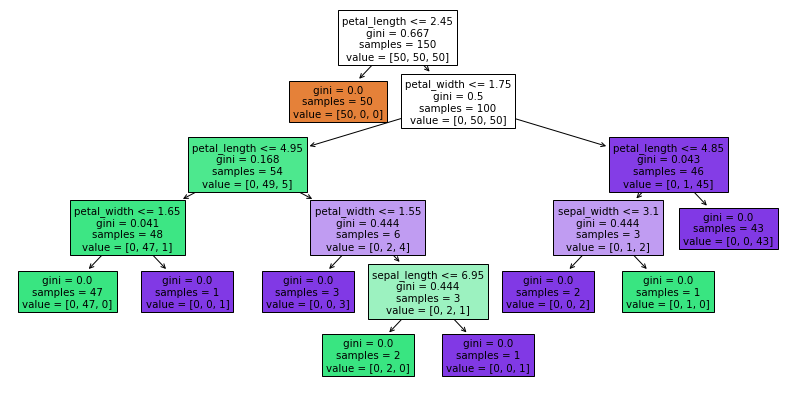

### Random Forest
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

**Random Forest** fue desarrollado por Leo Breiman y Adele Cutler en 1995 combinando el enfoque de "bagging" y la selección aleatoria de atributos: Se crean un cierto número de árboles poco eficientes -weak learners- cada uno de ellos entrenado considerando un subconjunto de las características predictivas y con una muestra aleatoria con repetición de nuestras muestras. Una vez creados, a la hora de realizar una predicción cada árbol va a emitir un voto con el mismo peso, devolviéndose la opción que más votos haya recibido.

In [7]:
from sklearn.ensemble import RandomForestClassifier

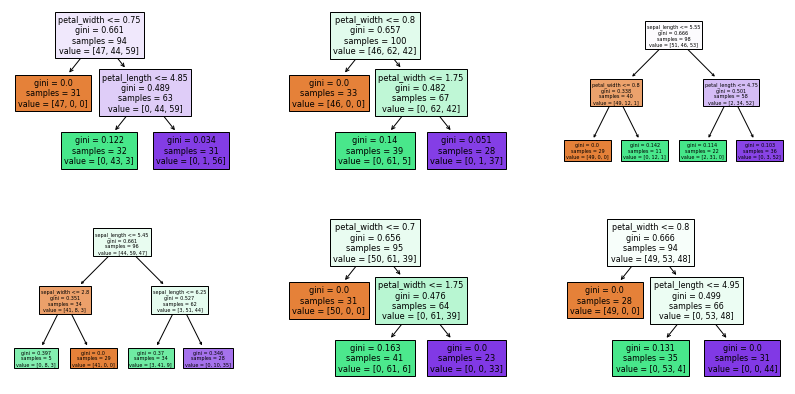

### Boosting
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En Machine Learning, **boosting** es un meta-algoritmo que, al igual que ocurre con *Random Forest*, tiene como objetivo convertir un conjunto de aprendices "débiles" en uno fuerte. En un principio, de hecho, el concepto de *boosting* hacía referencia solo a ese proceso de conversión de aprendices débiles en uno fuerte. Sin embargo, con el paso del tiempo el concepto ha ido tendiendo a considerar algoritmos de boosting a aquellos que cumplen ciertas condiciones:
* El algoritmo va a entrenar un conjunto de algoritmos débiles y los va a añadir al algoritmo fuerte buscado
* La aportación de cada aprendiz va a depender de su exactitud, de forma que el voto de los mejores aprendices valga más que el de los peores
* Los aprendices se van a generar en serie
* Aquellas muestras mal clasificadas por un aprendiz (supongamos que estamos en un escenario de clasificación) van a recibir un peso mayor que las bien clasificadas, de forma que el siguiente aprendiz va a dar una especial importancia a estas muestras para tratar de mejorar la predicción de su predecesor (lo que caracteriza a un algoritmos como "adaptativo")

Estas características descartarían a *Random Forest* como algoritmo de Boosting.

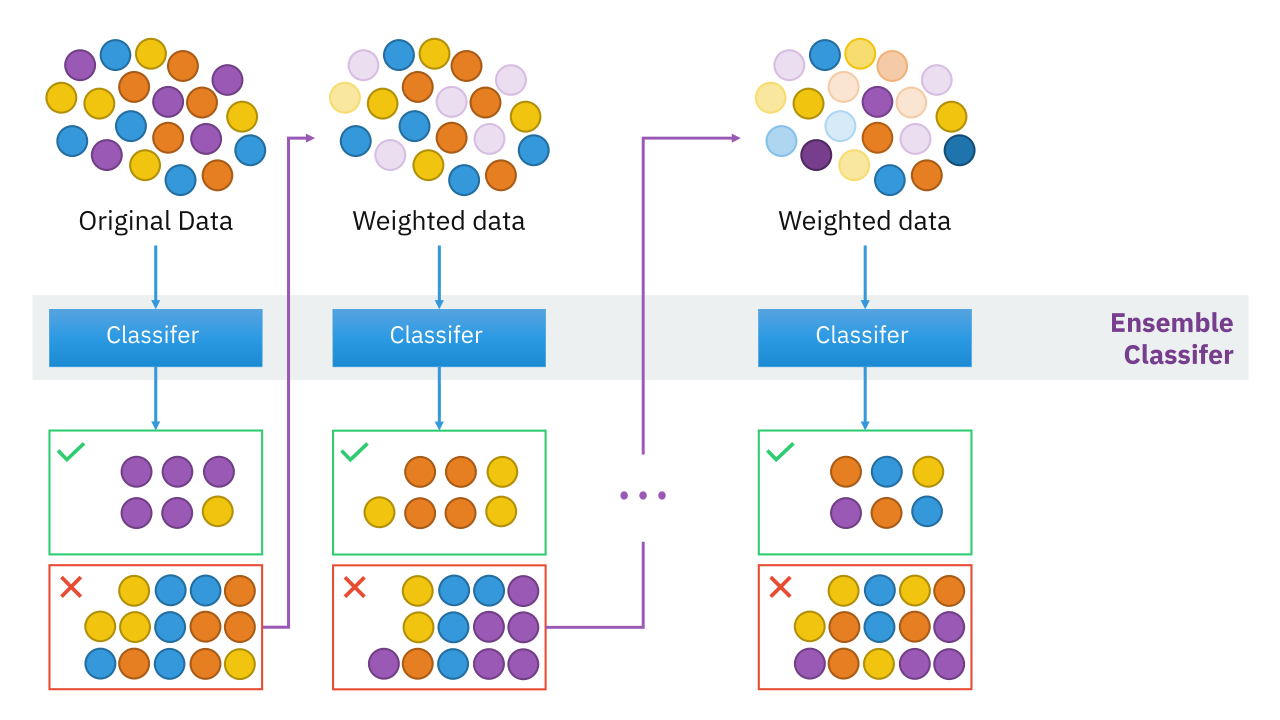

By Sirakorn - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=85888769
https://www.youtube.com/watch?v=LsK-xG1cLYA

# El dataset "Breast Cancer"
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Vamos a probar varios algoritmos de boosting en el dataset "Breast Cancer Wisconsin", conteniendo información de tumores. Lo cargamos de Scikit-Learn:

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target

In [10]:
X.shape

(569, 30)

Se trata de 569 muestras y 30 características predictivas. Las etiquetas de éstas son:

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

La variable objetivo es binaria y contiene información sobre si el tumor es o no maligno:

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Ahora, para tener una referencia, vamos a entrenar un árbol de decisión y un random forest:

### DecisionTreeClassifier y Breast Cancer
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
model = DecisionTreeClassifier(
    max_depth = 40,
    max_features = 14,
    max_leaf_nodes = 44,
    min_samples_leaf = 7,
    min_samples_split = 9,
    min_weight_fraction_leaf = 0.01,
    random_state = 0
)
cross_val_score(model, X, y, cv = 10).mean()

0.9596491228070174

Podemos dibujarlo con la función *plot_tree*:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

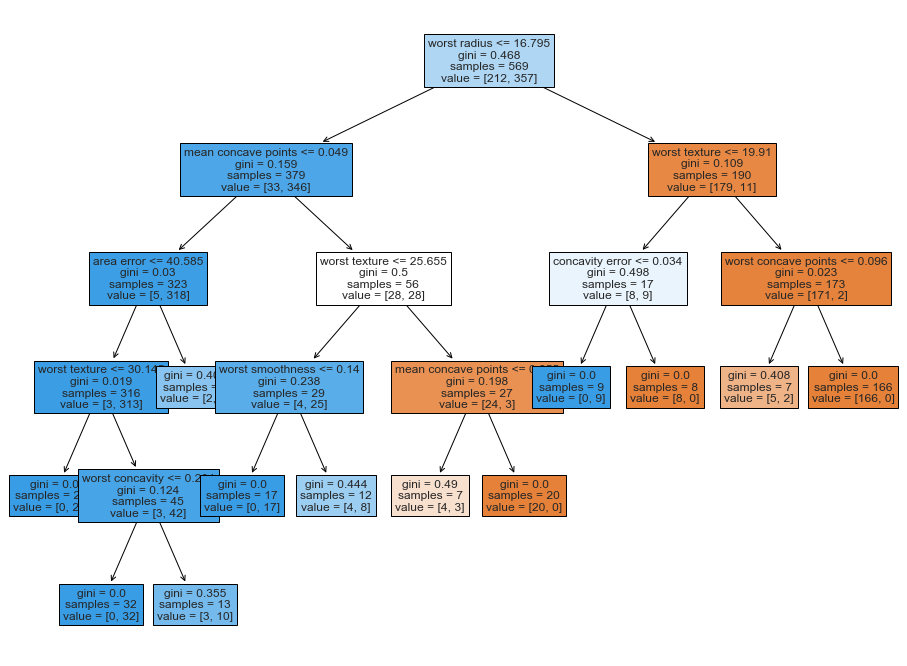

In [15]:
plt.style.use("seaborn-dark")
model.fit(X, y)
plt.figure(figsize = (16, 12))
_ = plot_tree(model, filled = True, feature_names = data.feature_names, fontsize = 12)

### RandomForestClassifier y Breast Cancer
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Ahora entrenemos un random forest:

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(
    max_depth = 27,
    max_features = 2,
    max_leaf_nodes = 27,
    min_samples_leaf = 1,
    min_samples_split = 8,
    min_weight_fraction_leaf = 0.02,
    n_estimators = 60,
    random_state = 0
)
cross_val_score(model, X, y, cv = 10).mean()

0.9614035087719298

# AdaBoost
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

**AdaBoost** (*Adaptative Boosting*) fue el primer algoritmo de boosting "adaptativo". Fue formulado por Yoav Freund y Robert Schapire en 1997, quienes ganaron el Gödel Prize en 2003 por su trabajo.

AdaBoost puede ser utilizado con muchos tipos de algoritmos para mejorar su rendimiento tanto en escenarios de clasificación como de regresión. La salidad de estos algoritmos (*aprendices débiles* o *week learners*) es combinada mediante una suma ponderada que representa la salida final del algoritmo de análisis.

Inicialmente todas las muestras reciben un mismo peso (igual a 1 dividido entre el número de muestras) pero, a medida que son correcta o incorrectamente clasificadas, su peso disminuye o aumenta respectivamente.

Veamos con un poco más de detalle cuál es el procedimiento:
1. Todas las muestras reciben inicialmente el mismo peso
1. Se entrena un aprendiz
1. Se evalúa el error del aprendiz como la suma de los pesos de aquellas muestras mal clasificadas
1. A partir del error calculado para el aprendiz, se evalúa el peso que el aprendiz tendrá en la predicción final con la siguiente fórmula:

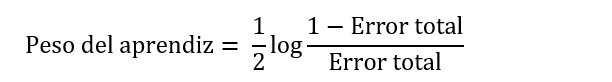

Veamos el aspecto de esta gráfica para entender cuál es el peso que se asigna al aprendiz en función de su error:

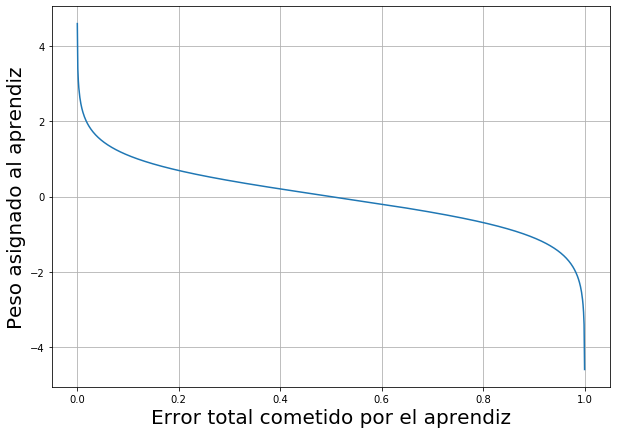

5. A continuación, se actualiza el peso de las muestras. Aquellas que han sido mal clasificadas reciben el nuevo peso dado por la siguiente función:

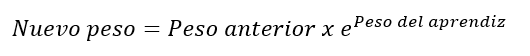

Esta gráfica tiene el siguiente aspecto:

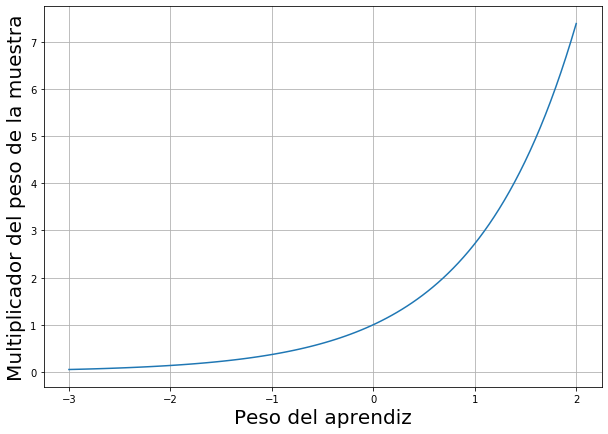

Por el contrario, las muestras bien clasificadas ven disminuido su peso según la siguiente fórmula:

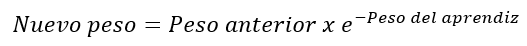

Esta otra gráfica tiene el siguiente aspecto:

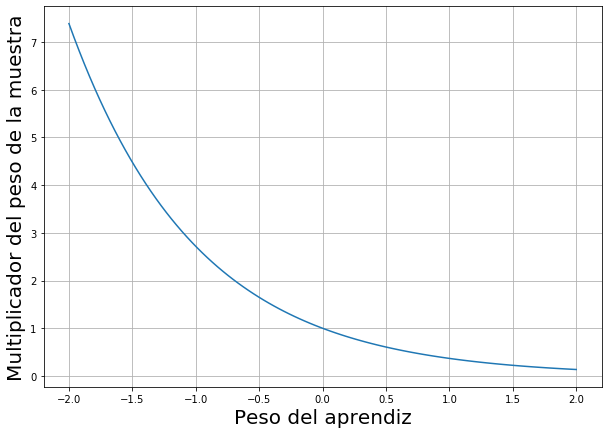

6. Los nuevos pesos se normalizan de forma que sumen 1
1. Se repite el proceso, creando un nuevo aprendiz que busca minimizar el error de clasificación cometido usando como criterio el **Índice de Gini ponderado** (que da importancia a las muestras según su peso) o bien generando un nuevo dataset "bootstrap" (extrayendo muestras aleatorias de nuestro dataset original con reemplazo considerando como probabilidad de extracción el peso de cada muestra)
1. A la hora de realizar una predicción, se suman los pesos de los aprendices que apoyan cada uno de los posibles resultados, escogiendo aquel apoyado por los aprendices que totalizan un peso mayor.

### AdaBoost y Breast Cancer
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Apliquémos ahora AdaBoost a nuestro dataset. Instanciemos el algoritmo y evaluémoslo con validación cruzada:

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
base_estimator = DecisionTreeClassifier(
    min_weight_fraction_leaf = 0.24,
    min_samples_split = 13,
    min_samples_leaf = 10,
    max_leaf_nodes = 85,
    max_features = 10,
    max_depth = 36,
    random_state = 0
)

model = AdaBoostClassifier(
    base_estimator = base_estimator,
    n_estimators = 281,
    learning_rate = 0.85,
    algorithm = "SAMME",
    random_state = 0
)
cross_val_score(model, X, y, cv = 10).mean()

0.987719298245614

### Parámetros de AdaBoostClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Veamos los parámetros de la implementación de Scikit-Learn:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#### base_estimator

Este parámetro es el algoritmo base en el que se va a basar AdaBoost.

#### n_estimators

Número máximo de aprendices. Si antes de crear este número de aprendizes ya se ha conseguido una predicción perfecta, el algoritmo se parará.

##### learning_rate

Este parámetro afecta a cómo los pesos se modifican de un árbol al siguiente: un valor menor supone que las muestras mal clasificadas verán aumentado su peso en una cantidad menor (y las bien clasificadas lo verán disminuido en una cantidad menor también), implicando un "aprendizaje más lento", mientras que un valor mayor supone incrementos más bruscos, implicando un "aprendizaje más rápido".

#### algorithm

Existen varias implementaciones de AdaBoost. Scikit-Learn ofrece dos: SAMME y SAMME.R La segunda -opción por defecto- converge más rápidamente que la primera, tal y como podemos ver en la documentación de Scikit-Learn. Una importante diferencia entre ambas es que en SAMME.R todos los aprendices reciben el mismo peso a la hora de realizar predicciones.

### Atributos de AdaBoostClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Para poder acceder a los atributos de nuestro modelo, vamos a entrenarlo primero:

In [20]:
model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=36,
                                                         max_features=10,
                                                         max_leaf_nodes=85,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=13,
                                                         min_weight_fraction_leaf=0.24,
                                                         presort='deprecated',
                            

#### base_estimator_

Algoritmo base usado.

In [21]:
model.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=36, max_features=10, max_leaf_nodes=85,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=13,
                       min_weight_fraction_leaf=0.24, presort='deprecated',
                       random_state=0, splitter='best')

#### estimators_

Este atributo nos da acceso a todos los aprendices generados. Por ejemplo, el primero de ellos es:

In [22]:
model.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=36, max_features=10, max_leaf_nodes=85,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=13,
                       min_weight_fraction_leaf=0.24, presort='deprecated',
                       random_state=209652396, splitter='best')

Visualicémoslo:

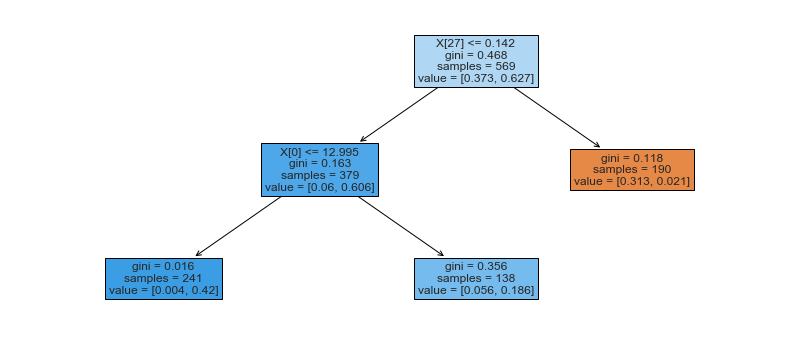

In [23]:
_ = plot_tree(model.estimators_[0], max_depth = 2, fontsize = 12, filled = True)

#### classes_

Etiquetas asignadas a las clases encontradas:

In [24]:
model.classes_

array([0, 1])

#### n_classes_

Número de clases

In [25]:
model.n_classes_

2

#### estimator_weights_

Pesos que han recibido los aprendices:

In [26]:
model.estimator_weights_[:5]

array([2.06629906, 1.6593858 , 1.28726077, 1.46638751, 0.96138216])

#### estimator_errors_

Error ponderado de cada aprendiz en el modelo final ensamblado:

In [27]:
model.estimator_errors_[:5]

array([0.08084359, 0.12431164, 0.18028402, 0.15120749, 0.24396962])

Podemos visualizarlos:

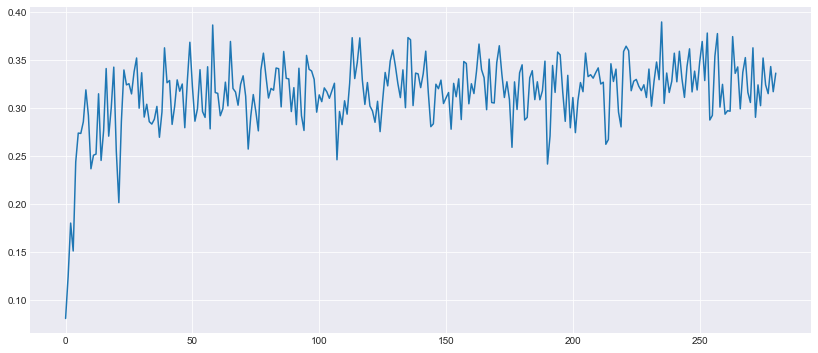

In [28]:
plt.plot(range(len(model.estimator_errors_)), model.estimator_errors_)
plt.grid()
plt.show()

Este error tiende a aumentar a medida que aumenta el número de iteraciones, tal y como vemos en la imagen anterior.

#### feature_importances_

Este atributo nos devuelve la importancia que el algoritmo ha dado a cada característica predictiva:

In [29]:
model.feature_importances_

array([0.00461228, 0.05918122, 0.01148596, 0.02476109, 0.03195819,
       0.03849549, 0.03501636, 0.04958625, 0.0086304 , 0.011466  ,
       0.01325151, 0.01546483, 0.00732097, 0.07270102, 0.00983437,
       0.03832885, 0.01114458, 0.04004269, 0.02766709, 0.06102512,
       0.04057811, 0.09320596, 0.03122051, 0.03417357, 0.04298222,
       0.01590987, 0.05198041, 0.03960156, 0.04957037, 0.02880315])

Podemos visualizar estas importancias:

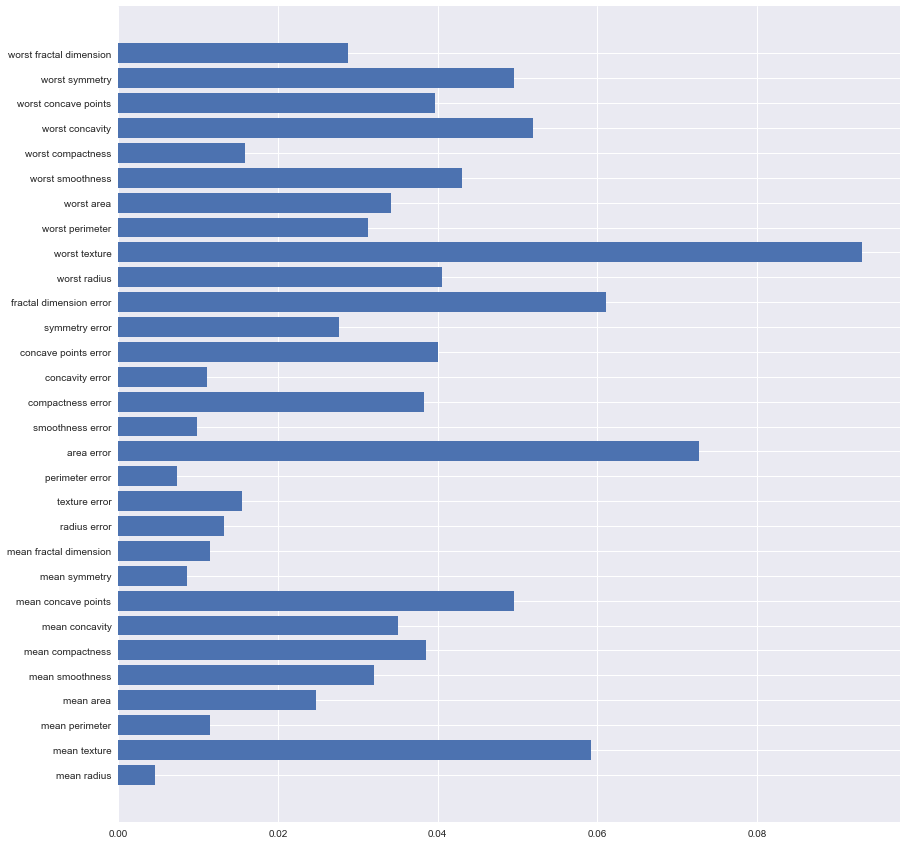

In [30]:
plt.style.use("seaborn")
fig = plt.figure(figsize = (14, 15))
ax = plt.barh(data.feature_names, model.feature_importances_)
plt.show()

### Ventajas y desventajas de AdaBoost
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### Ventajas de AdaBoost

* Fácil de implementar
* Acepta diferentes tipos de aprendices
* No tiende al sobreentrenamiento

#### Desventajas de AdaBoost

* Sensible al ruido y a los outliers
* Más lento que otros algoritmos de Boosting

# Gradient Boosting
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

**Gradient Boosting** es un meta-algoritmo supervisado no-paramétrico aplicable tanto en escenarios de regresión como de clasificación.

El hecho de tratarse de un método no-paramétrico significa que no va a crear la función de aproximación (de nuestras características predictivas a la variable objetivo) con un número fijo de parámetros con independencia del tamaño del conjunto de entrenamiento. Por el contrario, el número de parámetros variará en cada escenario -todos los algoritmos basados en árboles de decisión son no-paramétricos-.

Al igual que AdaBoost, se basa en el entrenamiento en serie de un conjunto de aprendices débiles, de forma que cada nuevo aprendiz intenta mejorar la predicción del anterior.

La mayor diferencia proviene del modo en el que ambos algoritmos construyen cada nuevo árbol: tal y como hemos visto, AdaBoost comienza creando un aprendiz inicial, estima el error cometido y modifica los pesos de cada muestra en función de éste. A continuación crea un nuevo aprendiz basándose en los pesos asignados y repite el proceso hasta que se han creado los aprendices solicitados o el error deja de mejorarse.

En Gradient Boosting, por el contrario, cada nuevo aprendiz intenta predecir el error cometido por el anterior aprendiz. El algoritmo comienzo calculando el valor medio de los valores de la variable objetivo. A continuación, construye un primer árbol de decisión para predecir los residuales -las diferencias entre los valores reales y dicho valor medio-. Y se va a sumar esta predicción (la predicción de los residuales) con la predicción inicial (el valor medio de los valores de la variable objetivo) para obtener una primera predicción.

En realidad, para evitar el sobreentrenamiento, Gradient Boosting introduce una tasa de aprendizaje o **learning rate** que limita la contribución de cada nuevo árbol a la predicción. De esta forma, para calcular esa primera predicción no se suma la predicción original (el valor medio de los valores de la variable objetivo) a la predicción de los residuales, sino que esta última se multiplica por dicha tasa de aprendizaje.

Esto supone que, tras la primera predicción de los residuales, el algoritmo ha dado un paso hacia los valores correctos. Este paso es pequeño pero, a medida que entrenamos más aprendices, el resultado va tendiendo hacia el valor correcto.

### Gradient Boosting y Breast Cancer
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Probemos este algoritmo con nuestro dataset. Comenzamos importando la clase correspondiente de Scikit-Learn:

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

E instanciamos el algoritmo con ciertos parámetros:

In [32]:
model = GradientBoostingClassifier(
    learning_rate = 0.45,
    max_depth = 20,
    max_features = 4,
    max_leaf_nodes = 77,
    min_samples_leaf = 11,
    min_samples_split = 15,
    min_weight_fraction_leaf = 0.26,
    n_estimators = 317,
    random_state = 0,
    subsample = 0.59
)

Evaluemos su exactitud usando validación cruzada:

In [33]:
cross_val_score(model, X, y, cv = 10).mean()

0.9807017543859649

### Parametros de GradientBoostingClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Revisemos los parámetros más importantes de esta implementación:

#### loss
Función de pérdida a usar durante el entrenamiento. Las opciones disponibles son "deviance" (valor por defecto) y "exponential". Podemos encontrar información adicional sobre estas funciones de error en el siguiente enlace:
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-poisson-gamma-and-tweedie-deviances

#### learning_rate
Multiplicador a aplicar al resultado de cada aprendiz. El valor por defecto es 0.1.

#### n_estimators
Número de aprendices a entrenar. El valor por defecto es 100.

#### subsample
Fracción de las muestras a usar durante el entrenamiento de cada aprendiz. Por defecto se incluirán todas las muestras (subsample = 1).

#### criterion
Criterio para realizar el "split" de cada nodo del árbol. Las opciones disponibles son "*mse*" (*mean squared error* o *error cuadrático medio*), "*mae*" (*mean absolute error* o *error absoluto medio*) y "*friedman_mse*", modificación de MSE de Jerome H. Friedman desarrollada en 1999 -opción por defecto-.

Podemos encontrar la descripción original del método "Friedman MES" en el siguiente enlace:
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf

#### min_samples_split
Número mínimo de muestras por nodo para poder dividirlo. El valor por defecto es 2, lo que supone que puedan existir nodos con una única muestra (véase siguiente parámetro).

#### min_samples_leaf
Número mínimo de muestras por hoja. Si una división llevaría a una hoja con menos muestras, la división no se realice.

#### max_depth
Máxima profundidad de los aprendices a entrenar. El valor por defecto es 3.

#### max_features
Máximo número de características a evaluar para calcular el mejor split de cada nodo. Por defecto se consideran todas.

#### max_leaf_nodes
Máximo número de hojas de cada aprendiz. Por defecto se permite un número ilimitado.

### Atributos de GradientBoostingClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### n_estimators_
Número de aprendices entrenados. Puede no coincidir con el valor del parámetro *n_estimators* si el algoritmo ha terminado antes de crearlos.

Por ejemplo:

In [34]:
model = GradientBoostingClassifier(n_estimators = 5)
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
model.n_estimators_

5

#### n_classes_
Número de clases encontradas.

In [36]:
model.n_classes_

2

#### estimators_
Este atributo nos da acceso a todos los aprendices entrenados:

Por ejemplo, entrenemos el algoritmo con 3 aprendices cada uno con una profundidad máxima de 3:

In [37]:
model = GradientBoostingClassifier(n_estimators = 3, max_depth = 3)
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Ahora mostremos la configuración cada árbol:

In [38]:
for c, tree in enumerate(model.estimators_):
    print(c, tree[0])

0 DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x1918B2D3488,
                      splitter='best')
1 DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x1918B2D3488,
                      splitter='best')
2 DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_dep

...y su esquema (limitando el número de niveles para poder leer la información mostrada):

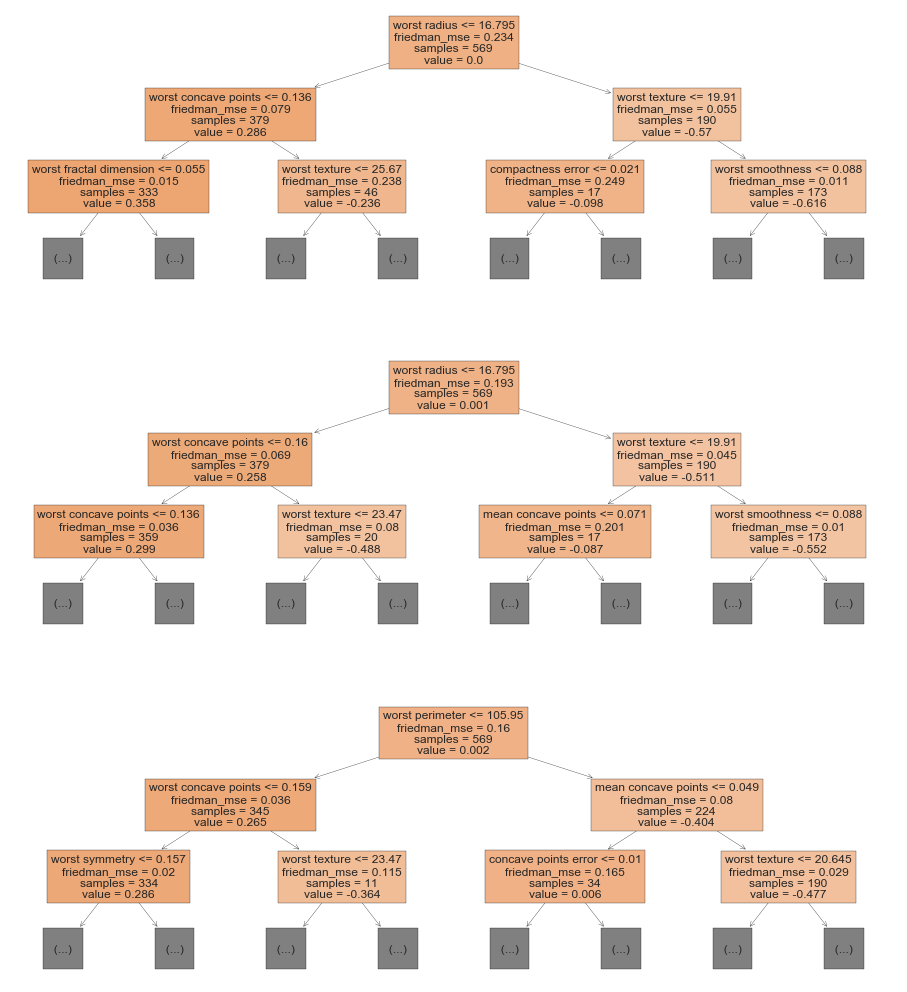

In [39]:
fig, ax = plt.subplots(model.n_estimators_, 1, figsize = (16, 18))
for c, tree in enumerate(model.estimators_):
    plot_tree(tree[0], ax = ax[c], feature_names = data.feature_names, filled = True,
              fontsize = 12, max_depth = 2)
plt.show()

#### oob_improvement_
Mejora en la función de pérdida para cada iteración calculada sobre las muestra "out of bag" (aquellas no consideradas en el entrenamiento). Para que este atributo esté disponible, el parámetro *subsample* deberá tomar un valor inferior a 1.

Por ejemplo, si utilizamos el 90% de las muestras para el entrenamiento de cada aprendiz:

In [40]:
model = GradientBoostingClassifier(n_estimators = 10, subsample = 0.9)
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
model.oob_improvement_

array([0.13356771, 0.10870676, 0.11192403, 0.07446585, 0.04691893,
       0.05725209, 0.04939843, 0.05257785, 0.04018528, 0.0328821 ])

Podemos dibujar esta evolución:

In [42]:
plt.rcParams["figure.figsize"] = (14, 5)

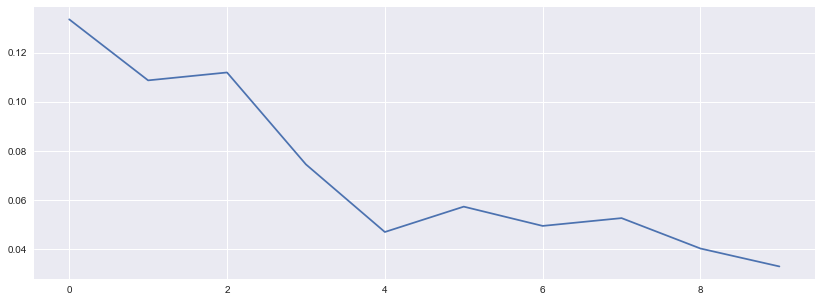

In [43]:
plt.plot(model.oob_improvement_)
plt.show()

#### train_score_
Este atributo nos devuelve el score (el resultado de la función de pérdida):

In [44]:
model.train_score_

array([1.15529414, 1.02783758, 0.89582202, 0.80989   , 0.71706557,
       0.65539018, 0.59063228, 0.53569126, 0.49154708, 0.44349413])

Mostremos su evolución:

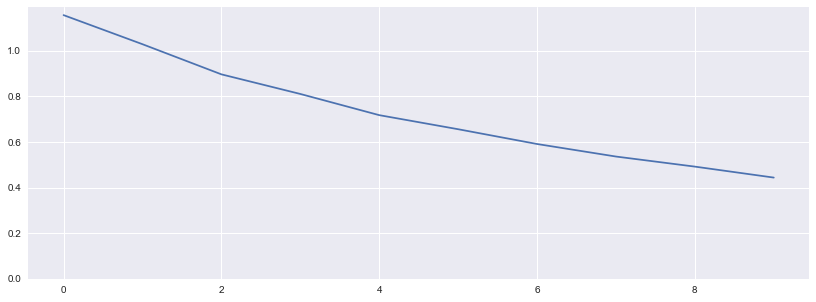

In [45]:
plt.plot(model.train_score_)
plt.ylim(0)
plt.show()

In [46]:
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

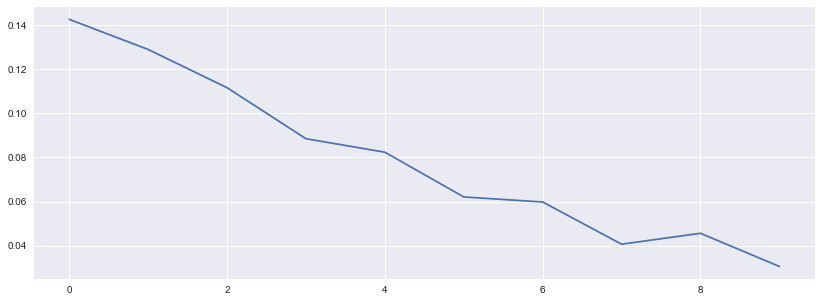

In [47]:
plt.plot(model.oob_improvement_);

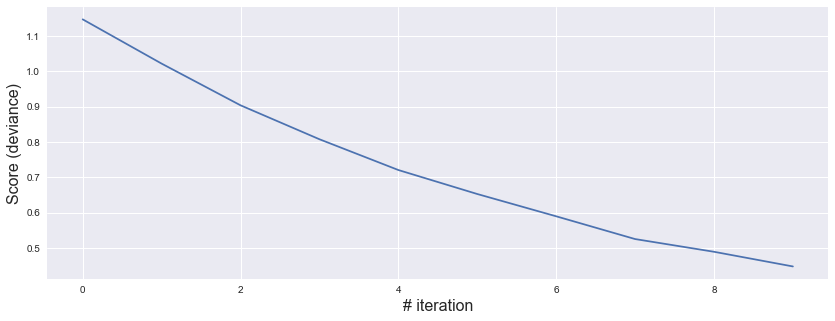

In [48]:
plt.plot(model.train_score_)
plt.xlabel("# iteration", fontsize = 16)
plt.ylabel("Score (deviance)", fontsize = 16)
plt.show()

# Resumen de resultados
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Y aquí tenemos el resumen de los resultados obtenidos: se indica el score (exactitud) y el tiempo necesario para entrenar 1000 modelos.

* Decision Tree......... 0.95965 - 0:00:21
* Random Forest...... 0.96140 - 1:05:48
* Ada Boost.............. 0.99122 - 1:20:10 
* Gradient Descent... 0.98593 - 0:47:35

# Ventajas y desventajas de los algoritmos de Boosting
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

#### Ventajas

* Compatible con datos heterogéneos (datos con diferentes escalas)
* Soportan diferentes funciones de pérdida
* Capaces de detectar de forma automática interacciones entre características predictivas (incluyendo relaciones no lineales)

#### Desventajas

* Requieren un ajuste fino cuidadoso
* El entrenamiento puede ser lento, aunque las predicciones son rápidas
* No pueden extrapolar datos
* Complejos de interpretar

# El dataset MNIST
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Vamos a probar los algoritmos vistos con el dataset de mnist, conteniendo dígitos manuscritos. Lo cargamos de Scikit-Learn:

In [49]:
from sklearn.datasets import load_digits

In [50]:
digits = load_digits()
X = digits.data
y = digits.target

In [51]:
X.shape

(1797, 64)

Se trata de un dataset con 1.797 muestras conteniendo 8x8 píxels. Escojamos una muestra aleatoria y veamos qué número contiene:

In [52]:
n = np.random.randint(len(digits))

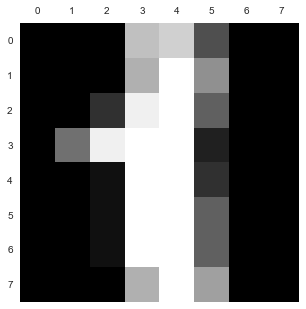

Se trata del número 1


In [53]:
plt.matshow(X[n].reshape(8, 8), cmap = "gray")
plt.grid(False)
plt.show()
print("Se trata del número {}".format(y[n]))

Ahora, para tener una referencia, vamos a entrenar un árbol de decisión y un random forest:

### DecisionTreeClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [54]:
model = DecisionTreeClassifier(
    max_depth = 10,
    max_features = 25,
    max_leaf_nodes = 95,
    min_samples_leaf = 1,
    min_samples_split = 6,
    random_state = 0
)
cross_val_score(model, X, y, cv = 5).mean()

0.8136242649334571

Podemos dibujarlo con la función *plot_tree*:

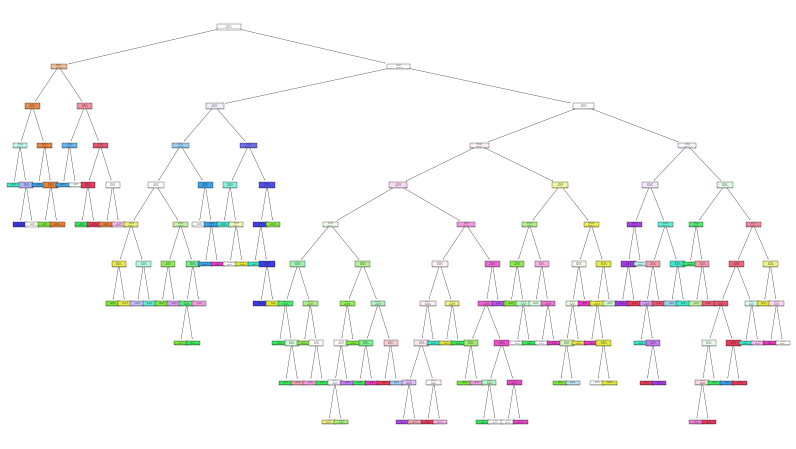

In [55]:
model.fit(X, y)
plt.figure(figsize = (14, 8))
_ = plot_tree(model, filled = True)

Podemos visualizar la base del árbol:

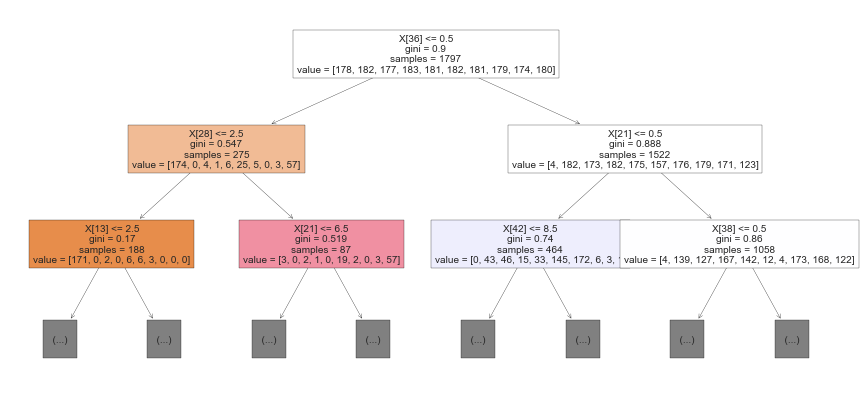

In [56]:
plt.figure(figsize = (15, 7))
_ = plot_tree(model, max_depth = 2, filled = True, fontsize = 10, rotate = True)

### RandomForestClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ahora entrenemos un random forest:

In [57]:
model = RandomForestClassifier(
    max_depth = 45,
    max_features = 2,
    n_estimators = 398,
    random_state = 0
)
cross_val_score(model, X, y, cv = 5).mean()

0.9482575054162797

In [58]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=398,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### AdaBoostClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [59]:
base_estimator = DecisionTreeClassifier(
    min_weight_fraction_leaf = 0.01,
    min_samples_split = 21,
    min_samples_leaf = 3,
    max_leaf_nodes = 65,
    max_features = 7,
    max_depth = 18,
    random_state = 0
)

model = AdaBoostClassifier(
    base_estimator = base_estimator,
    n_estimators = 351,
    learning_rate = 0.23,
    algorithm = "SAMME",
    random_state = 0
)
cross_val_score(model, X, y, cv = 5).mean()

0.9493779015784586

* DecisionTreeClassifier...........0.8330540037243948
* RandomForestClassifier........0.9482575054162797
* AdaBoostClassifier................0.9493779015784586
* GradientBoostingClassifier....0.9499288146084804

### GradientBoostingClassifier
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [60]:
model = GradientBoostingClassifier(
    learning_rate = 0.12,
    max_depth = 17,
    max_features = 8,
    max_leaf_nodes = 289,
    min_samples_leaf = 6,
    min_samples_split = 6,
    min_weight_fraction_leaf = 0.07,
    n_estimators = 241,
    random_state = 0,
    subsample = 0.89
)
cross_val_score(model, X, y, cv = 5).mean()

0.9499288146084804

# Evolución del error
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ahora vamos a dividir nuestro dataset en un bloque de entrenamiento y otro de validación, y vamos a ver, para cada iteración de Gradient Boosting, cuál es el rendimiento del algoritmo aplicando el aprendiz correspondiente a los datos de entrenamiento y de validación. Comenzamos dividiendo nuestro dataset:

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Ahora entrenamos el algoritmo con el bloque de entrenamiento:

In [63]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.12, loss='deviance', max_depth=17,
                           max_features=8, max_leaf_nodes=289,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=6,
                           min_weight_fraction_leaf=0.07, n_estimators=241,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.89, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

El método *.staged_predict(X)* nos devuelve la predicción del algoritmo para el dataset X para cada iteración (es decir, para cada aprendiz que se ha creado):

In [64]:
train_prediction = list(model.staged_predict(X_train))

Por ejemplo, en la iteración 0, la predicción del aprendiz para los datos de entrenamiento es:

In [65]:
train_prediction[0]

array([3, 1, 3, ..., 7, 2, 8])

...cuando los datos reales son:

In [66]:
y_train

array([3, 1, 3, ..., 7, 2, 8])

Podemos evaluar la exactitud de nuestro modelo en esta primera iteración:

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_train, train_prediction[0])

0.6681514476614699

No es mala, pero parece que, en ese punto del proceso, todavía hay margen de mejora...

Calculemos la exactitud para todos los aprendices (para todas las iteraciones) y almacenemos los resultados en una lista:

In [69]:
train_score = []
for i in range(model.n_estimators_):
    train_score.append(accuracy_score(y_train, train_prediction[i]))

Veamos cuál ha sido la evolución de esta métrica:

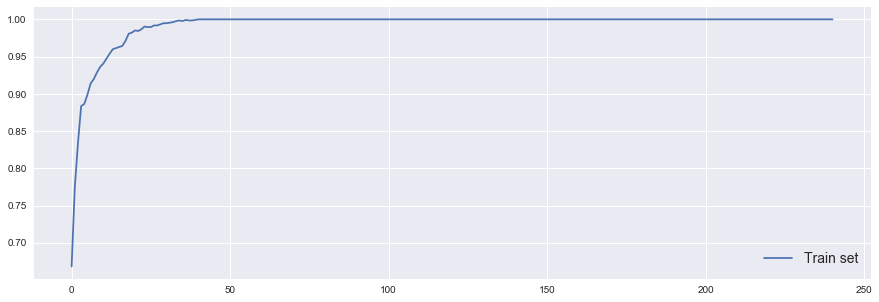

In [70]:
plt.figure(figsize = (15, 5))
plt.plot(range(model.n_estimators_), train_score, label = "Train set")
plt.legend(fontsize = 14)
plt.show()

Comprobamos que alcanza un valor muy alto a partir de la iteración... 30, más o menos. Pero claro, estamos evaluando el modelo sobre los mismos valores con los que estamos entrenándolo. ¿Cuál será la exactitud si usamos el conjunto de validación? Nuevamente, el método *.staged_predict()* nos permite obtener la predicción (en este caso para el conjunto de validación) para todas las iteraciones:

In [71]:
test_prediction = list(model.staged_predict(X_test))

Por ejemplo, en la iteración 0, la predicción del aprendiz para los datos de validación es:

In [72]:
test_prediction[0]

array([1, 7, 9, 5, 1, 2, 4, 5, 7, 5, 2, 5, 8, 4, 6, 8, 6, 4, 9, 3, 5, 1,
       5, 1, 5, 4, 1, 0, 8, 5, 4, 8, 9, 2, 5, 1, 0, 1, 6, 2, 0, 7, 9, 9,
       3, 0, 6, 7, 8, 3, 7, 4, 4, 1, 0, 9, 5, 9, 7, 2, 9, 3, 2, 0, 5, 8,
       4, 7, 1, 4, 3, 1, 5, 9, 7, 5, 1, 3, 3, 6, 3, 6, 3, 6, 6, 0, 2, 3,
       5, 1, 0, 3, 3, 7, 8, 0, 6, 4, 0, 3, 2, 2, 6, 3, 4, 1, 7, 0, 9, 5,
       9, 5, 1, 9, 7, 3, 3, 7, 6, 4, 1, 7, 0, 2, 0, 4, 1, 6, 3, 0, 4, 8,
       9, 0, 7, 3, 7, 1, 3, 2, 6, 9, 6, 5, 6, 8, 4, 9, 6, 1, 3, 1, 3, 9,
       1, 6, 6, 3, 0, 0, 1, 9, 2, 1, 0, 7, 2, 7, 6, 9, 4, 4, 2, 2, 8, 9,
       8, 7, 1, 3, 3, 4, 0, 2, 6, 9, 2, 1, 9, 4, 2, 3, 1, 9, 7, 5, 9, 0,
       3, 9, 0, 4, 0, 6, 7, 9, 6, 2, 2, 5, 7, 7, 2, 5, 9, 9, 7, 7, 6, 6,
       7, 3, 9, 3, 4, 1, 6, 6, 9, 2, 3, 4, 1, 9, 1, 1, 4, 7, 1, 1, 6, 2,
       0, 1, 6, 9, 3, 7, 3, 1, 6, 1, 7, 9, 8, 4, 5, 1, 7, 9, 4, 1, 6, 2,
       7, 2, 1, 9, 9, 0, 6, 6, 0, 4, 4, 7, 3, 9, 6, 3, 2, 7, 4, 7, 2, 9,
       6, 5, 5, 4, 6, 2, 9, 0, 7, 7, 1, 1, 2, 5, 4,

...cuando los datos reales son:

In [73]:
y_test

array([9, 7, 3, 3, 4, 0, 6, 7, 8, 8, 2, 5, 3, 6, 5, 8, 8, 4, 4, 3, 3, 1,
       5, 1, 5, 4, 6, 2, 8, 5, 4, 3, 9, 2, 5, 1, 0, 1, 6, 2, 0, 9, 9, 0,
       8, 4, 5, 7, 8, 3, 7, 4, 1, 3, 4, 5, 5, 9, 7, 2, 9, 3, 2, 0, 5, 3,
       4, 1, 1, 4, 3, 1, 5, 6, 5, 9, 1, 8, 8, 6, 3, 5, 3, 5, 6, 0, 8, 3,
       8, 1, 4, 2, 9, 1, 8, 0, 6, 4, 6, 3, 2, 5, 6, 3, 9, 1, 8, 0, 9, 5,
       5, 5, 4, 9, 7, 8, 2, 4, 6, 5, 3, 5, 0, 2, 0, 4, 9, 6, 3, 0, 1, 3,
       9, 0, 7, 3, 7, 1, 3, 2, 6, 9, 3, 8, 6, 2, 9, 5, 6, 3, 3, 1, 3, 9,
       1, 5, 6, 3, 0, 0, 1, 9, 2, 8, 0, 3, 2, 7, 8, 0, 4, 0, 1, 6, 8, 9,
       0, 9, 8, 3, 8, 4, 2, 2, 6, 3, 2, 1, 9, 6, 6, 5, 1, 9, 8, 5, 8, 0,
       9, 9, 0, 1, 0, 8, 7, 9, 0, 5, 2, 5, 7, 7, 8, 5, 9, 9, 5, 5, 5, 6,
       7, 3, 9, 2, 9, 1, 6, 8, 5, 5, 3, 4, 1, 5, 8, 3, 6, 5, 1, 1, 3, 1,
       0, 1, 8, 9, 2, 8, 3, 1, 6, 1, 4, 9, 8, 5, 8, 1, 7, 9, 2, 1, 6, 2,
       4, 7, 1, 9, 5, 0, 2, 3, 0, 5, 6, 9, 3, 8, 4, 3, 2, 1, 4, 8, 6, 0,
       6, 5, 5, 6, 6, 7, 9, 0, 4, 1, 1, 1, 2, 8, 4,

Veamos cuál es la exactitud de nuestro modelo en esta primera iteración:

In [74]:
accuracy_score(y_test, test_prediction[0])

0.5644444444444444

Peor que con los datos de entrenamiento (lógicamente). Calculemos la exactitud para todas las iteraciones y mostremos la evolución en una gráfica:

In [75]:
test_score = []
for i in range(model.n_estimators_):
    test_score.append(accuracy_score(y_test, test_prediction[i]))

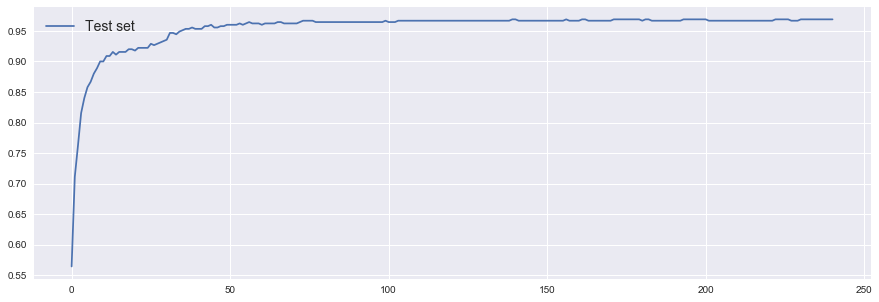

In [76]:
plt.figure(figsize = (15, 5))
plt.plot(range(model.n_estimators_), test_score, label = "Test set")
plt.legend(fontsize = 14)
plt.show()

En este caso la exactitud no alcanza un valor tan elevado como con los datos de entrenamiento.

Mostremos ambas gráficas juntas:

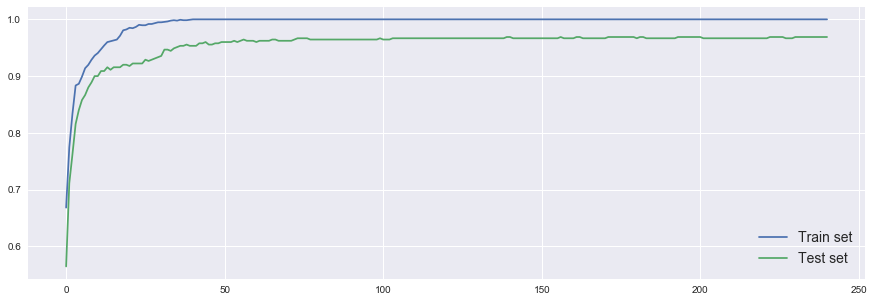

In [77]:
plt.figure(figsize = (15, 5))
plt.plot(range(model.n_estimators_), train_score, label = "Train set")
plt.plot(range(model.n_estimators_), test_score, label = "Test set")
plt.legend(fontsize = 14)
plt.show()

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>